## Gold Price Predictor

##### Using Kaggle Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Collecting & Reading Data

In [2]:
# loading csv data into pandas dataframe

goldprice_data = pd.read_csv('./gld_price_data.csv')

In [3]:
# First 5 rows of data

goldprice_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
goldprice_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
goldprice_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
goldprice_data.shape

(2290, 6)

In [7]:
goldprice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### no missing values

### checking correlation 

In [8]:
goldprice_data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


#### Since gold (GLD) and silver (SLV) have a value of 0.866632, thus means they are positively correlated.

### Heatmap for better visualization of the correlations

<AxesSubplot:>

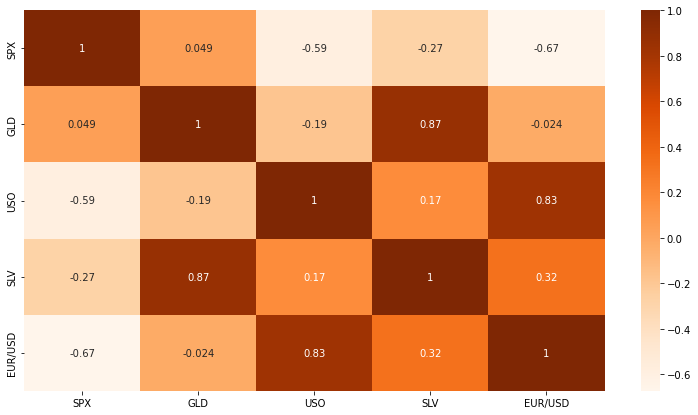

In [9]:
plt.figure(figsize=(13,7))
sns.heatmap(goldprice_data.corr(), cbar=True, annot=True,cmap='Oranges')

### Distribution of GLD price

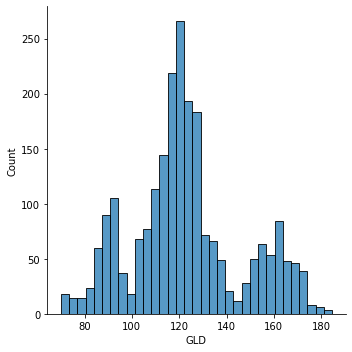

In [10]:
sns.displot(goldprice_data["GLD"])

### We will be using SPX, USO, SLV and EUR/USD features and their correlation to GLD to predict GLD price.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#### Splitting Features 

In [12]:
# to use SPX, USO, SLV & EUR/USD features, we drop the other columns
X = goldprice_data.drop(['Date', 'GLD'], axis = 1)

# GLD is the target column
Y = goldprice_data['GLD']

#### Training & testing data

In [13]:
# Testing 18% of the data, training 82%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.18, random_state = 0)

In [14]:
# Train model using Random Forest 
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Evaluating Model

In [15]:
# Predicting gold prices

testdata_predict = regressor.predict(X_test)

In [16]:
print(testdata_predict)

[126.96919906 116.68449947 139.65139987 122.13060034  94.14090055
 155.05750054 117.51020114 113.31870124 153.43640022 105.43050041
 103.11519866 120.15970102  92.16089942 159.66320135 121.55209838
 117.46200085  86.43109792  91.88809926  92.89110008 126.15080004
  83.61789943 117.80679876 126.276298   172.32349785 168.82659738
 139.41300203 114.37239966 159.89190189 134.30100125 116.03680038
 111.14840107 104.7806019  127.95360089 122.15429948  99.30529963
 119.99699988  84.43300016 114.94770001 127.4169986  140.27399884
 107.16770062 131.57620124 108.37089926 134.87770041 133.64679889
 148.86219954 119.66220043 157.7051006  156.05420046 127.6174995
 123.98979983 115.11349867 123.71940022 118.86869995 153.73290035
 121.56039934 112.42530006  86.92959979 155.60850059 118.17500082
  88.32869966 114.77240032  83.07479916 146.89139892 125.38439976
 127.25699933 125.05149935 121.20389991 168.14730139 121.89509907
 125.63610186 172.72939822 121.58220131 170.27310221 119.02900071
 127.508499

### Comparing Predicted GLD Price values with the actual GLD Price values

#### Plotting Actual Values and Predicted Values

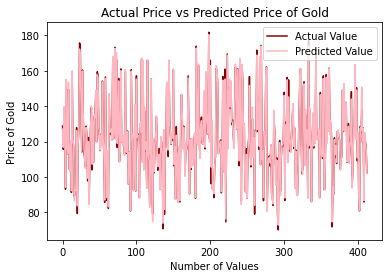

In [17]:
plt.plot(list(Y_test), color="DarkRed", label ='Actual Value')
plt.plot(testdata_predict, color='lightPink',label='Predicted Value')
plt.title('Actual Price vs Predicted Price of Gold')
plt.xlabel('Number of Values')
plt.ylabel('Price of Gold')
plt.legend()
plt.show()

In [18]:
# Mean Accuracy
model_result = round(regressor.score(X_train, Y_train)*100,2)

print(model_result)

99.85
